In [27]:
#Bilbiotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#Extracción de datos
a=pd.read_csv('https://raw.githubusercontent.com/borjafernanruiz/TFM-UNIR-/main/Datos/Datos_procesados.csv',sep=';')

In [29]:
a

,Unnamed: 0,Pais,Fecha,Casos_media_7_dias,Muertes_media_7_dias,Porcentaje_vacunacion,Poblacion
0,19823,Austria,2020-01-06,0.000000,0.000000,0.000000,9043072.0
1,19817,Austria,2020-01-07,0.000000,0.000000,0.000000,9043072.0
2,19815,Austria,2020-01-08,0.000000,0.000000,0.000000,9043072.0
3,19791,Austria,2020-01-09,0.000000,0.000000,0.000000,9043072.0
4,19777,Austria,2020-01-10,0.000000,0.000000,0.000000,9043072.0
...,...,...,...,...,...,...,...
20947,19770,Sweden,2022-02-15,7803.714286,47.857143,74.366011,10160159.0
20948,19771,Sweden,2022-02-16,5975.142857,51.142857,74.393265,10160159.0
20949,19772,Sweden,2022-02-17,4136.428571,53.285714,74.429593,10160159.0
20950,19773,Sweden,2022-02-18,3646.571429,50.142857,74.469907,10160159.0


In [30]:
#Cambio a formato fecha
a['Fecha']=pd.to_datetime(a['Fecha'])

In [31]:
#Función que realiza el acumulado 
def acumulado(a): #Hace el acumulado
    V=[]
    v=0
    for i in a:
        v=v+i
        V=V+[v]
    return V

In [32]:
#Aplicación del Modelo SIR modificado para la obtención de la curva de letalidad 
def Calculos(Pais):
    FILTRO=a[a['Pais']==Pais]
    VM=FILTRO['Muertes_media_7_dias']
    VC=FILTRO['Casos_media_7_dias']
    PP=FILTRO['Porcentaje_vacunacion']
    M=acumulado(FILTRO['Muertes_media_7_dias'])
    F=list(VM) #Emepzar donde haya las primeras muertes
    for i in range(0,len(F)):
        if F[i]!=0:
            p=i
            break
    VM=list(VM[p:])
    VC=list(VC[p:])
    PP=list(PP[p:])
    M=[0]+M[p:len(M)-1]
    #Condiciones iniciales
    VL=0
    gamma=1/5.8
    L=0.005
    I=VM[0]/L*gamma
    VI=VC[0]-VM[0]/L
    LL=[L]
    II=[I]
    ii=[0]
    for i in range(1,len(VC)):
        I=I+VI
        L=L+VL
        II=II+[I]
        LL=LL+[L]
        ii=ii+[i]
        VL=(gamma*I-VM[i]*L)/M[i]
        VI=VC[i]-gamma*I
    letalidad=(gamma*np.array(VM)/np.array(II))
    ii=np.array(ii)+p
    return (VC,VM,II,M,PP,LL,ii,p,letalidad)

In [33]:
#Cogemos España como ejemplo
ESPAÑA=Calculos('Spain')

Text(0.5, 0, 'Días desde 1/2/2020')

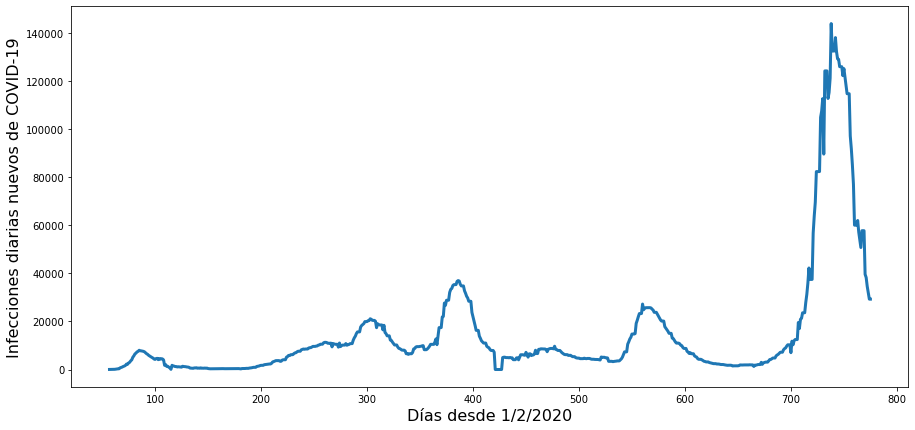

In [34]:
#Visualización 1
plt.figure(figsize=(15,7))
plt.plot(ESPAÑA[6],ESPAÑA[0],linewidth=3.0)
plt.ylabel("Infecciones diarias nuevos de COVID-19", size = 16,)
plt.xlabel("Días desde 1/2/2020", size = 16,)

Text(0.5, 0, 'Días desde 1/2/2020')

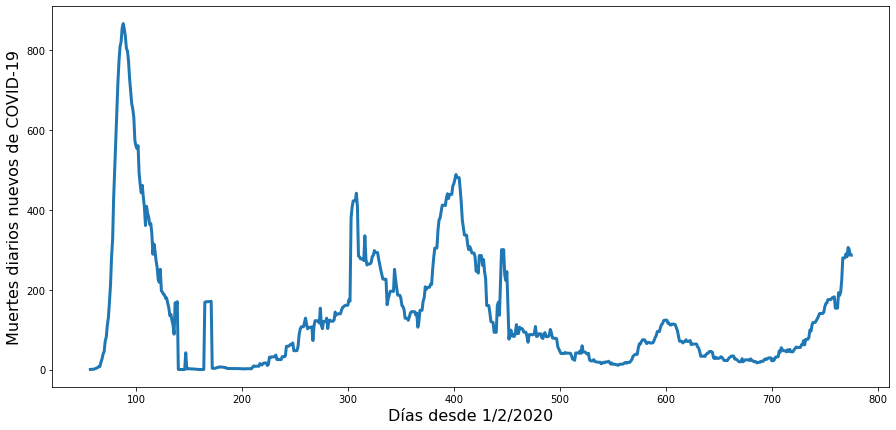

In [35]:
#Visualización 2
plt.figure(figsize=(15,7))
plt.plot(ESPAÑA[6],ESPAÑA[1],linewidth=3.0)
plt.ylabel("Muertes diarios nuevos de COVID-19", size = 16,)
plt.xlabel("Días desde 1/2/2020", size = 16,)

Text(0.5, 0, 'Días desde 1/2/2020')

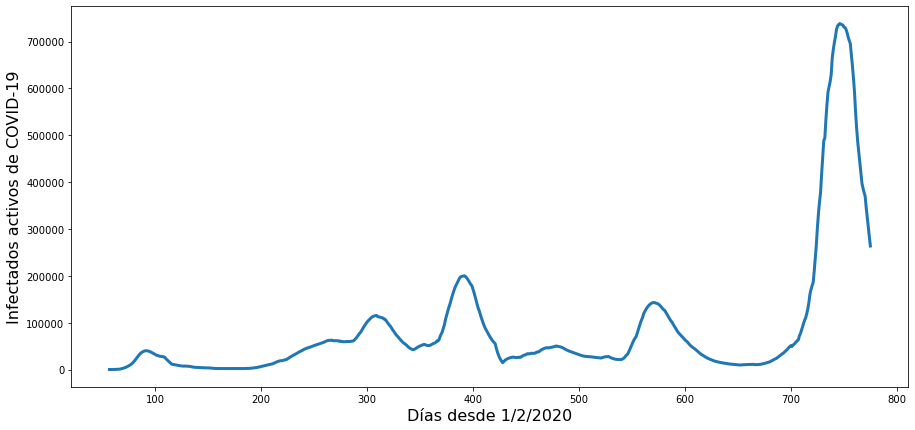

In [36]:
#Visualización 3
plt.figure(figsize=(15,7))
plt.plot(ESPAÑA[6],ESPAÑA[2],linewidth=3.0)
plt.ylabel("Infectados activos de COVID-19", size = 16,)
plt.xlabel("Días desde 1/2/2020", size = 16,)

Text(0.5, 0, 'Días desde 1/2/2020')

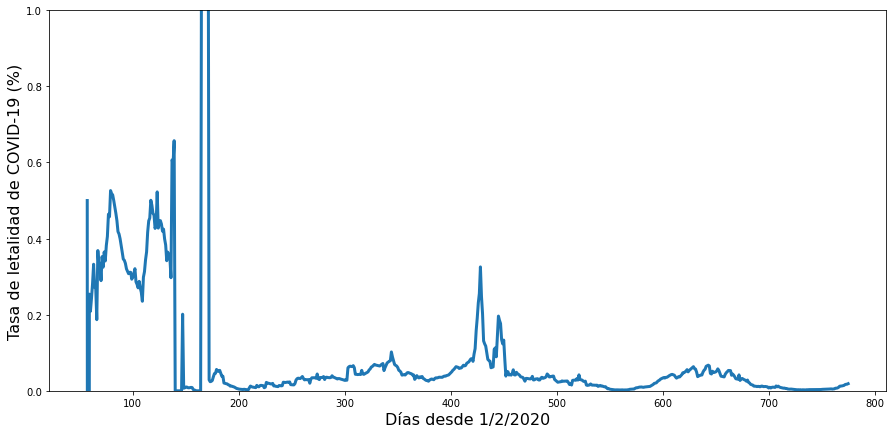

In [37]:
#Visualización 4
plt.figure(figsize=(15,7))
plt.plot(ESPAÑA[6],ESPAÑA[8]*100,linewidth=3.0)
plt.ylim(0,1)
plt.ylabel("Tasa de letalidad de COVID-19 (%)", size = 16,)
plt.xlabel("Días desde 1/2/2020", size = 16,)

In [38]:
#Quitamos Luxemburgo por baja calidad en sus datos de vacunación 
PAISES=list(set(a.Pais)-set(['Luxembourg']))

In [39]:
#Calcula el inicio de los gráficos, para coordinar todas las series
MAX=[]
for i in PAISES:
    A=Calculos(i)
    MAX=MAX+[A[7]]
MAXIMO=max(MAX)
print(MAXIMO)

93


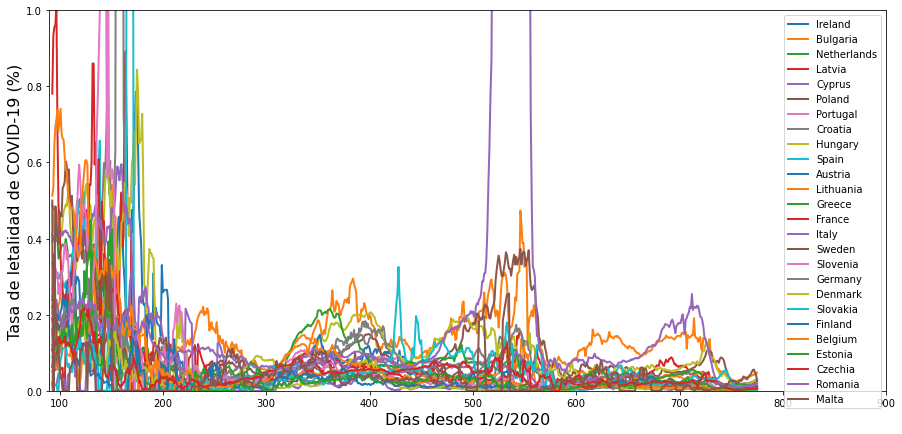

In [40]:
#Cálculo y visuluaciación de las curvas de letalidad
Var=8
n=1
plt.figure(figsize=(15,7))
for i in PAISES:
    A=Calculos(i)
    numi=MAXIMO-A[7]
    
    plt.plot(range(0+MAXIMO,len(A[Var][numi:])+MAXIMO),A[Var][numi:]*100,linewidth=2.0,label=i)
    plt.xlim(90,900)
    plt.ylim(0,1)
    if n!=1:
        S=S+np.array(A[Var][numi:])
        SV[i]=np.array(A[Var][numi:])
    if n==1:
        n=2
        S=np.array(A[Var][numi:])
        SV=pd.DataFrame({i:S})
plt.ylabel("Tasa de letalidad de COVID-19 (%)", size = 16,)
plt.xlabel("Días desde 1/2/2020", size = 16,)
plt.legend(loc = "upper right")
#Media=np.array(S)/len(PAISES)

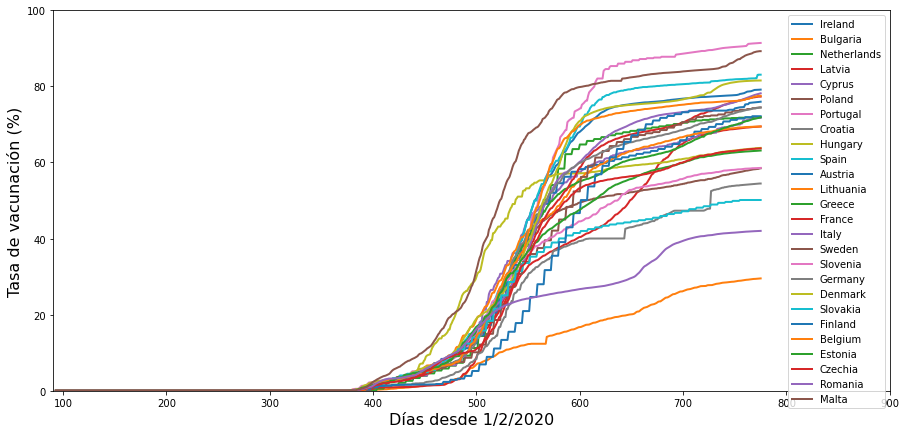

In [41]:
#Cálculo y visuluaciación de las curvas de vacunación
Var=4
n=1
plt.figure(figsize=(15,7))
for i in PAISES:
    A=Calculos(i)
    numi=MAXIMO-A[7]
    
    plt.plot(range(0+MAXIMO,len(A[Var][numi:])+MAXIMO),A[Var][numi:],linewidth=2.0,label=i)
    plt.xlim(90,900)
    plt.ylim(0,100)
    if n!=1:
        S2=S2+np.array(A[Var][numi:])
        SV2[i]=np.array(A[Var][numi:])
    if n==1:
        n=2
        S2=np.array(A[Var][numi:])
        SV2=pd.DataFrame({i:S2})
plt.ylabel("Tasa de vacunación (%)", size = 16,)
plt.xlabel("Días desde 1/2/2020", size = 16,)
plt.legend(loc = "upper right")
Media=np.array(S2)/len(PAISES)

In [42]:
#Primer intervalo de estudio
LETALIDAD=SV[600:680].mean()
VACUNACION=SV2[600:680].mean()

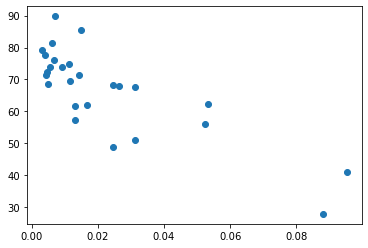

In [43]:
#Diagrama de dispersión del primer intervalo
plt.scatter(LETALIDAD*100, VACUNACION)

In [44]:
#Segundo intervalo de estudio
LETALIDAD2=SV[500:600].mean()
VACUNACION2=SV2[500:600].mean()

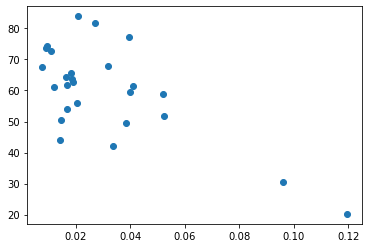

In [45]:
#Diagrama de dispersión del segundo intervalo
plt.scatter(LETALIDAD2*100, VACUNACION2)

In [46]:
#Importamos bilbioteca para ajustes
import statsmodels.api as sm

In [47]:
#Primer ajuste
Y=np.array(LETALIDAD)*100
X=VACUNACION
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     44.05
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           7.27e-07
Time:                        16:22:51   Log-Likelihood:                 73.525
No. Observations:                  26   AIC:                            -143.0
Df Residuals:                      24   BIC:                            -140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1184      0.015      8.012      0.000       0.088       0.149
0             -0.0014      0.000     -6.637      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.609   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.170
Skew:                           0.512   Prob(JB):                        0.557
Kurtosis:                       2.825   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Periodo del día 700 a 782')

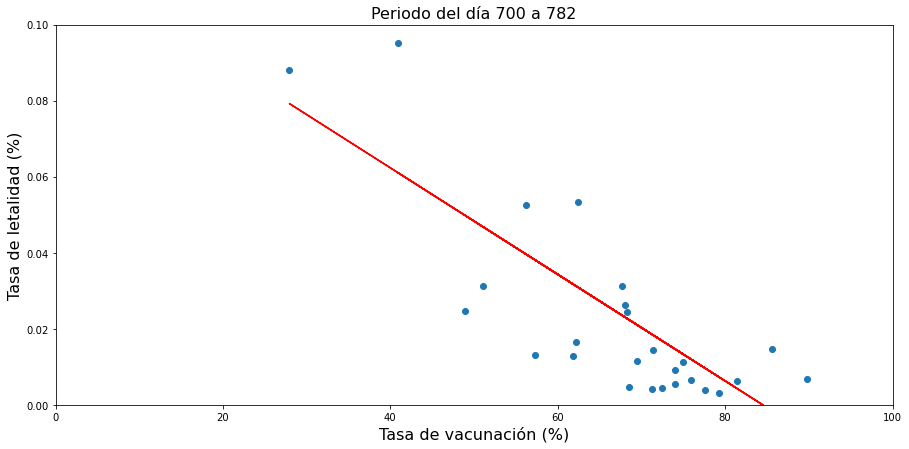

In [48]:
#Representación primer ajuste
plt.figure(figsize=(15,7))
plt.scatter(VACUNACION,LETALIDAD*100)
m=-0.0014
n=0.1184
plt.plot(X,np.array(X)*m+n,'r')
plt.xlim(0,100)
plt.ylim(0,0.10)
plt.ylabel("Tasa de letalidad (%)", size = 16,)
plt.xlabel("Tasa de vacunación (%)", size = 16,)
plt.title('Periodo del día 700 a 782', size = 16)

In [49]:
#Segundo ajuste
Y=np.array(LETALIDAD2)*100
X=VACUNACION2
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     21.30
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           0.000110
Time:                        16:23:27   Log-Likelihood:                 66.421
No. Observations:                  26   AIC:                            -128.8
Df Residuals:                      24   BIC:                            -126.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1039      0.016      6.358      0.000       0.070       0.138
0             -0.0012      0.000     -4.616      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.890
Skew:                           0.313   Prob(JB):                        0.641
Kurtosis:                       2.345   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Periodo del día 600 a 700')

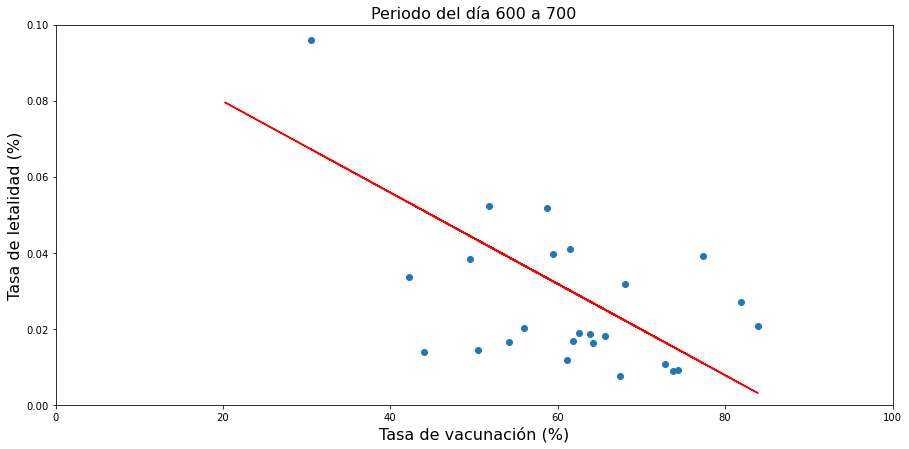

In [50]:
#Representación segundo ajuste
plt.figure(figsize=(15,7))
plt.scatter(VACUNACION2,LETALIDAD2*100)
m=-0.0012
n=0.1039
plt.plot(X,np.array(X)*m+n,'r')
plt.xlim(0,100)
plt.ylim(0,0.10)
plt.ylabel("Tasa de letalidad (%)", size = 16,)
plt.xlabel("Tasa de vacunación (%)", size = 16,)
plt.title('Periodo del día 600 a 700', size = 16)